In [1]:
%matplotlib inline


# FIfa dataset with autosklearn and Tpot (automl tools)


In [21]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from fi_utils import load_dataset
import autosklearn.classification
from plt_utils import plot_confusion_matrix
from benchmark_utils import timer
from sklearn.metrics import confusion_matrix
#!pip install tpot
from tpot import TPOTClassifier
#!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o


In [6]:

X, y, class_names = load_dataset()

X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, test_size=0.20, 
                                                    random_state=42)



Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_directories
    "auto-sklearn." % self.output_directory)
ValueError: Failed to delete output dir: /tmp/autosklearn_cv_example_out because auto-sklearn did not create it. Please make sure that the specified output dir does not exist when instantiating auto-sklearn.


## Test using autosklearn

In [ ]:

automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn_cv_example_tmp',
        output_folder='/tmp/autosklearn_cv_example_out',
        delete_tmp_folder_after_terminate=True,
        resampling_strategy='cv',
        resampling_strategy_arguments={'cv': {'folds': 5}},
)

In [10]:

# fit() changes the data in place, but refit needs the original data. We
# therefore copy the data. In practice, one should reload the data
start_time = timer(None)
automl.fit(X_train.copy(), y_train.copy(), dataset_name='fifa')
# During fit(), models are fit on individual cross-validation folds. To use
# all available data, we call refit() which trains all models in the
# final ensemble on the whole dataset.
automl.refit(X_train.copy(), y_train.copy())
timer(start_time)
print(automl.show_models())

predictions = automl.predict(X_test)


Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_directories
    "auto-sklearn." % self.output_directory)
ValueError: Failed to delete output dir: /tmp/autosklearn_cv_example_out because auto-sklearn did not create it. Please make sure that the specified output dir does not exist when instantiating auto-sklearn.
Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_d

[WARNING] [2019-05-30 20:39:53,720:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:39:53,736:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:39:55,740:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:39:57,745:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:39:59,751:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:40:01,756:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:40:03,759:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:40:05,766:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] [2019-05-30 20:40:07,772:EnsembleBuilder(1):fifa] No models better than random - using Dummy Score!
[WARNING] 

Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_directories
    "auto-sklearn." % self.output_directory)
ValueError: Failed to delete output dir: /tmp/autosklearn_cv_example_out because auto-sklearn did not create it. Please make sure that the specified output dir does not exist when instantiating auto-sklearn.
Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_d

1
['/tmp/autosklearn_cv_example_tmp/.auto-sklearn/ensembles/1.0000000000.ensemble', '/tmp/autosklearn_cv_example_tmp/.auto-sklearn/ensembles/1.0000000001.ensemble', '/tmp/autosklearn_cv_example_tmp/.auto-sklearn/ensembles/1.0000000002.ensemble']


Exception ignored in: <function BackendContext.__del__ at 0x7fe349e21510>
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 127, in __del__
    self.delete_directories(force=False)
  File "/home/bruno/anaconda3/lib/python3.7/site-packages/autosklearn/util/backend.py", line 136, in delete_directories
    "auto-sklearn." % self.output_directory)
ValueError: Failed to delete output dir: /tmp/autosklearn_cv_example_out because auto-sklearn did not create it. Please make sure that the specified output dir does not exist when instantiating auto-sklearn.



 Time taken: 0 hours 2 minutes and 3.17 seconds.
[(0.940000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},
dataset_properties={
  'task': 2,
  's

In [11]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.8861519975968759


Figure(720x504)


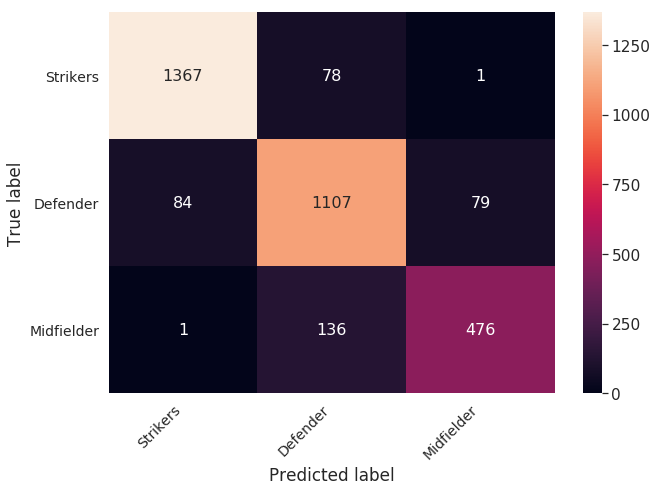

In [18]:
cf = confusion_matrix(y_test,predictions)

print(plot_confusion_matrix(cf,class_names=class_names))

## Test using TPOT


In [24]:
pipeline_optimizer = TPOTClassifier(generations=3, population_size=10, cv=10,
                                    random_state=42, verbosity=2)
start_time = timer(None)
pipeline_optimizer.fit(X_train, y_train)
timer(start_time)
print(pipeline_optimizer.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.8773475920340505
Generation 2 - Current best internal CV score: 0.8773475920340505
Generation 3 - Current best internal CV score: 0.8793017984107359

Best pipeline: LogisticRegression(GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=9, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=12, n_estimators=100, subsample=0.05), C=25.0, dual=False, penalty=l1)

 Time taken: 3 hours 12 minutes and 21.42 seconds.
0.8909582457194353


In [25]:
print(help(pipeline_optimizer))

Help on TPOTClassifier in module tpot.tpot object:

class TPOTClassifier(tpot.base.TPOTBase)
 |  TPOTClassifier(generations=100, population_size=100, offspring_size=None, mutation_rate=0.9, crossover_rate=0.1, scoring=None, cv=5, subsample=1.0, n_jobs=1, max_time_mins=None, max_eval_time_mins=5, random_state=None, config_dict=None, template='RandomTree', warm_start=False, memory=None, use_dask=False, periodic_checkpoint_folder=None, early_stop=None, verbosity=0, disable_update_check=False)
 |  
 |  TPOT estimator for classification problems.
 |  
 |  Method resolution order:
 |      TPOTClassifier
 |      tpot.base.TPOTBase
 |      sklearn.base.BaseEstimator
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  classification = True
 |  
 |  default_config_dict = {'sklearn.cluster.FeatureAgglomeration': {'affin...
 |  
 |  regression = False
 |  
 |  scoring_function = 'accuracy'
 |  
 |  ----------------------------------------------------------------------

In [26]:
preds = pipeline_optimizer.predict(X_test)

Figure(720x504)


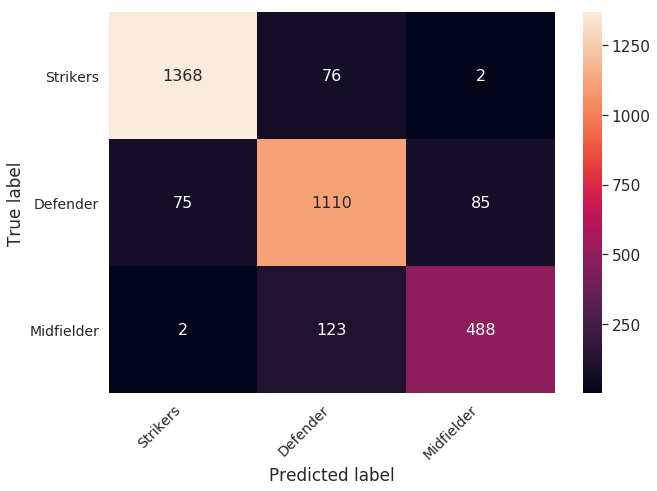

In [27]:
cf = confusion_matrix(y_test,preds)

print(plot_confusion_matrix(cf,class_names=class_names))

## Test using H20 (one vs all for multiclass problem)